# Tarea 1
### Reconocimiento de Patrones en Minería de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import *
import scipy

df = pd.read_csv('beer_reviews/beer_reviews.csv')

df.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [2]:
print "Dimensiones del dataset: ",df.shape
beer_names = set(df.beer_name)
print "Cantidad de nombres de cervezas distintas: ",len(beer_names)
profile = set(df.review_profilename)
print "Cantidad de nombres de perfiles de usuarios distintos: ",len(profile)
styles = set(df.beer_style)
print "Cantidad de tipos de cervezas distintos: ",len(styles)
names = set(df.brewery_name)
print "Cantidad de nombres distribuidoras de cervezas distintas: ",len(names)

Dimensiones del dataset:  (1586614, 13)
Cantidad de nombres de cervezas distintas:  56857
Cantidad de nombres de perfiles de usuarios distintos:  33388
Cantidad de tipos de cervezas distintos:  104
Cantidad de nombres distribuidoras de cervezas distintas:  5743


In [2]:
#transforma a tipo categorico
df["brewery_name"] = df["brewery_name"].astype('category')
df["beer_style"] = df["beer_style"].astype('category')
df["beer_name"] = df["beer_name"].astype('category')
df["review_profilename"] = df["review_profilename"].astype('category')

df.info()

#codifica
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null category
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null category
beer_style            1586614 non-null category
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null category
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: category(4), float64(6), int64(3)
memory usage: 126.3 MB


,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,5438,1234817823,1.5,2.0,2.5,30566,65,1.5,1.5,44426,5.0,47986
1,10325,5438,1235915097,3.0,2.5,3.0,30566,51,3.0,3.0,41738,6.2,48213
2,10325,5438,1235916604,3.0,2.5,3.0,30566,59,3.0,3.0,6887,6.5,48215
3,10325,5438,1234725145,3.0,3.0,3.5,30566,61,2.5,3.0,44425,5.0,47969
4,1075,1480,1293735206,4.0,4.5,4.0,23008,9,4.0,4.5,11359,7.7,64883


El dataset corresponde a reseñas realizadas por distintos usuarios a cervezas del sitio web BeerAdvocate. El cual corresponde a datos recopilados desde Enero de 1998 hasta Noviembre de 2011. Las filas del dataset representan a las críticas realizadas por un usuario en partícular sobre alguna cerveza en específico, lo cual corresponde a aproximademente 1.5 millones de críticas. Las 13 columnas del dataset corresponden a las distintas características de cada crítica. Estas características son del tipo entero, reales y string (categóricas).

Algunos datos relevantes del dataset son que la cantidad de nombre de cervezas distintas son 56857, la cantidad de nombres de perfiles de usuarios distintos son 33388, la cantidad de tipo de cervezas distintas 104 y la cantidad de nombres distribuidoras de cervezas distintas son 5743. Donde estos dos últimos son candidatos a etiquetas de los cluster.

Los atributos que serán utilizados para realizar los *clustering* serán los pertenecientes a la puntuación de la crítica, es decir, general (*review_overall*), aroma (*review_aroma*), apariencia (*review_appearence*), sabor (*review_taste*), sensación al paladar (*review_palate*). Estos atributos son numéricos reales (continuos), por otro lado los atributos categóricos son codificados para ser utilizados como posibles etiquetas.

### Proyecta a 2d

In [113]:
df_sample = df.sample(10000, random_state = 142)

En la celda anterior se toma una muestra representativa de los datos para poder analizar el efecto de los distintos algoritmos de una manera más rapida, además de que los algoritmos aglomerativos (HAC) tienen errores de memoria con una mayor cantidad de datos.

In [114]:
columns = ['review_overall','review_aroma','review_appearance','review_palate','review_taste']

df_numericos = df_sample.ix[:,columns]

X = df_numericos.as_matrix()
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn import manifold
#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X_std)

from sklearn.decomposition import PCA
X_red = PCA(n_components=2).fit_transform(X_std)

In [115]:
df_numericos.describe()

,review_overall,review_aroma,review_appearance,review_palate,review_taste
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.816500,3.730000,3.836700,3.739800,3.788700
std,0.726141,0.711407,0.623957,0.686508,0.732124
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4.500000,4.000000,4.000000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000


Se utiliza el metodo *describe()* para visualizar el rango de los atributos a considerar, y aunque estos ya vienen en un mismo rango y representan las mismas unidades, es necesario centrar los datos para poder realizar una proyección como la de PCA.

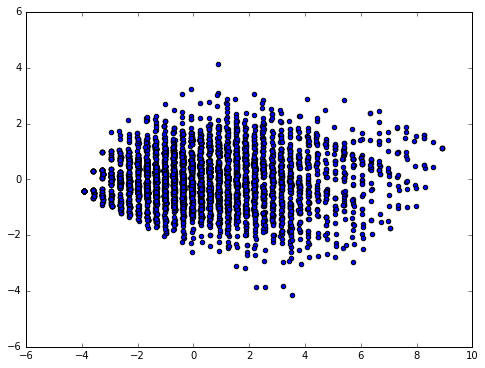

In [116]:
plt.figure(figsize=(8,6))
plt.scatter(X_red[:,0],X_red[:,1])
plt.show()

El gráfico anterior representa todos los datos en una proyección 2D, mediante PCA, para tener una visualización general de la data antes de aplicar los distintos algoritmos, donde se puede ver que tiene forma bastante compacta e isotrópica.

# Cluster
----

## K-means

Este algoritmo funciona a través del cálculo de centroides usando como base la media aritmética en el cálculo de distancia, en otras palabras, se utiliza la distancia promedio de cada dato a su centroide más cercano y así clusterizar.

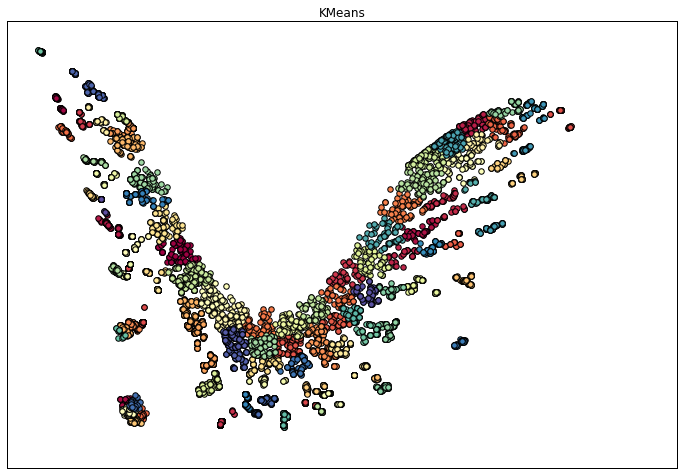

In [100]:
from sklearn.cluster import KMeans
k = 100
#se ajusta kMeans a los datos
k_means = KMeans(init="random", n_clusters=k, n_init=100)
#init = "k-means++"

k_means.fit(X_red)

k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
plt.xticks(())
plt.yticks(())
plt.show()

Se cuenta con 3 parámetros escenciales, **init**, **n_clusters** y **n_init** para realizar variaciones y para poder observar cual combinación de estos produce un mejor resultado en la clusterización.

La idea es poder encontrar la combinacion de parametros que permita una visualizacion razonable de los clusters.

Al variar el parámetro *init* de "random" a "k-means++" se puede apreciar que no existe mejora alguna, ni siquiera variando el numero de clusters ($k$), por lo que se piensa que este parámetro no es tan relevante a la hora de encontrar mejores resultados.

Al variar el parámetro *n_clusters* en intervalos de 2 a 50, se puede observar que K-means siempre intenta clusterizar el número indicado de clusters de manera 'circular', debido a que K-means funciona con cluster isotrópicos, por lo que es bastante homogénea la cantidad de datos de cada cluster al momento de comparar. Tambien, al aumentar el número de cluster el tiempo de computación aumenta considerablemente.

Al variar el parámetro *n_init* en intervalos de 10 a 100, no se observan grandes cambios, mas allá del cambio de etiquetas de cada cluster y del mayor tiempo computacional.

## Mini batch K-means

Este algoritmo también funciona a través del cálculo de centroides usando como base la media aritmética en el cálculo de distancias, de la misma forma que K-means, pero la única diferencia es que este algoritmo trabaja con una muestra de los datos para el cálculo de los centroides y no con toda la data, luego de esto asigna todos los datos al centroide más cercano correspondiente.

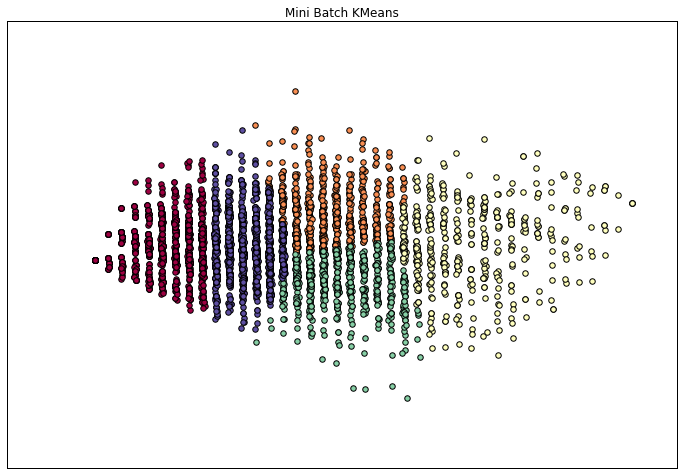

In [117]:
from sklearn.cluster import MiniBatchKMeans
k = 5
#se ajusta mini batch kMeans aa los datos
k_means = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=10, init = "k-means++")
#init : {‘k-means++’, ‘random’ or an ndarray}, default: ‘k-means++’

k_means.fit(X_red)

mini_k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_

#se grafica
plt.figure(figsize=(12,8))
plt.title('Mini Batch KMeans')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = mini_k_means_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()


Se cuenta con 3 parámetros escenciales, **n_clusters**, **batch_size** y **init** para realizar variaciones y poder observar cual combinación de estos produce un mejor resultado en la clusterización.

La idea es poder encontrar la combinación de parámetros que permita una visualización razonable de los clusters.

Al variar el parámetro *init* de "random" a "k-means++", no se observan grandes cambios, esto es por la forma compacta de los datos, ya que los centroides de los cluster se ajustan a los datos y los "navegan" encontrando valores óptimos. Esto no ocurriría si es que los cluster estuvieran mas alejados entre sí, por lo que en ese caso sería necesario un inicializador en base a una grilla como "k-means++".

Al variar el parámetro *n_clusters*  en intervalos de 2 a 50 se puede apreciar que no se observa mejora alguna, esto se produce ya que el algoritmo unicamente intenta encontrar los cluster entregados como parámetros, por lo que si se supieran de antemano la cantidad de cluster quizas se pudiera encontrar resultados más óptimos.

Al combinar los parámetros *batch_size* e *init*, variando en intervalos de 10 a 1000 y fijado como "random" respectivamente, se puede observar una gran variación en los cluster encontrados por este algoritmo. Caso contrario sucede cuando se varía *batch_size* fijando *init* como "k-means++" lo cual no se observan grandes variaciones al cambiar el tamaño del batch. Esto es explicado ya que con la inicialización en "random", los pocos datos del batch quedan muy sujetos a esta aleatoridad, por otro lado si es una inicialización mas espacial como "k-means++" es bastante estable la asignación, por ello el parámetro por defecto está asignado así.

## HAC complete

Este algoritmo algomerativo funciona a través de una jerarquía de los datos, donde cada dato es asignado a su dato mas cercano y se comienzan a asignar cluster de manera jerárquica. Donde la distancia entre cluster es del tipo Complete, por lo que es medida entre los dos elementos de cada cluster más distinto entre sí.

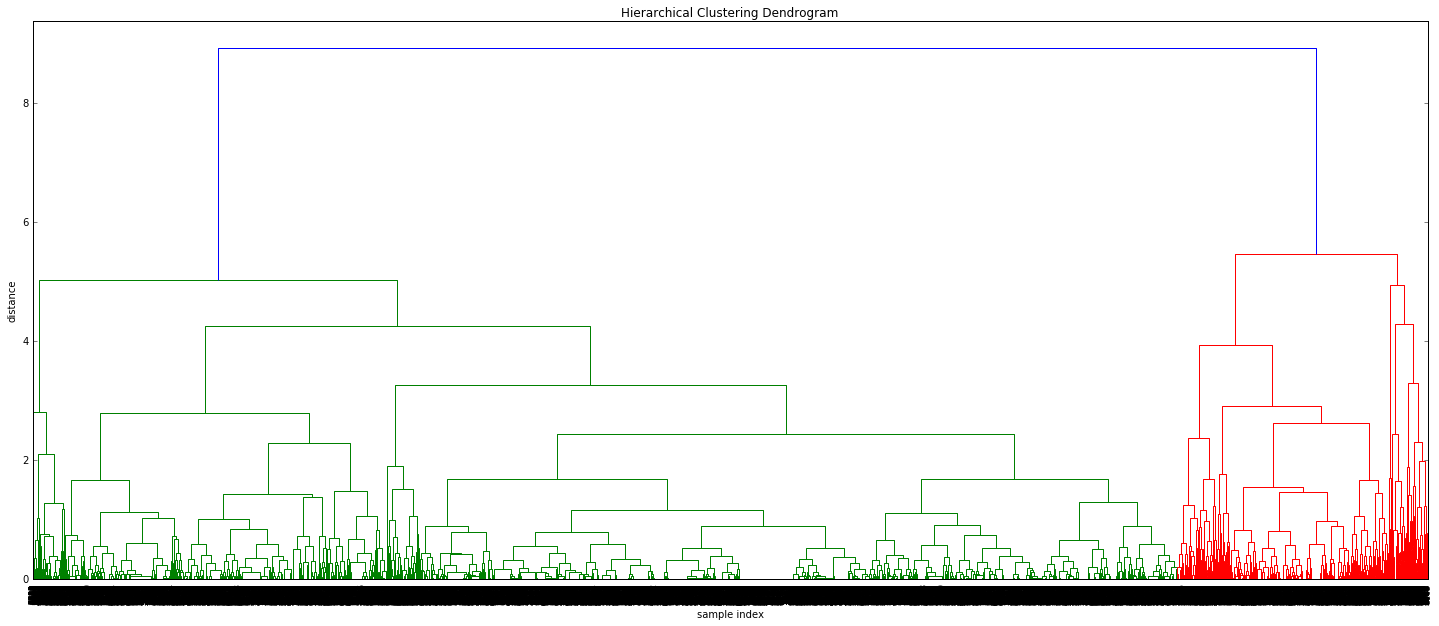

In [28]:
#codigo desde: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_red, 'complete') # o X

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

La imagen anterior muestra una representacion del árbol jerárquico del dataset correspondiente a las críticas de las cervezas, donde se puede ver que la unión de cada cluster es bastante balanceada debido a la estructura compacta de los datos. Donde, en base a la cantidad de cluster requeridos, se realiza un corte horizontal en esta estructura y se asignan los cluster correspondientes.

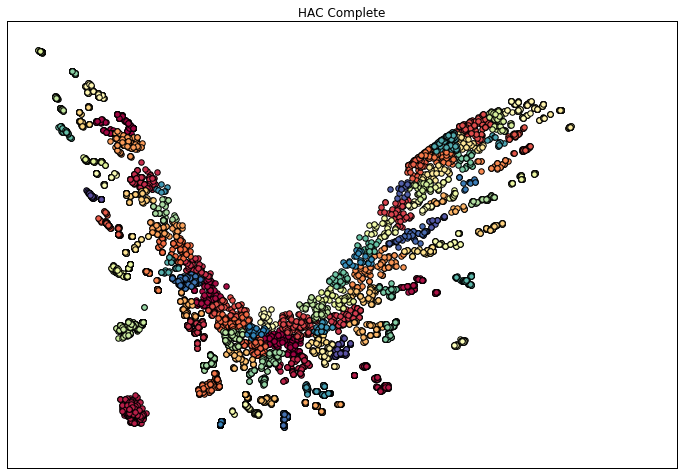

In [6]:
from sklearn.cluster import AgglomerativeClustering as hac
#se ajusta algortmo Hac
k = 100
clustering = hac(linkage="complete", n_clusters=k, affinity="euclidean")
#affinity : string or callable, default: “euclidean”
#Can be “euclidean”, “l1”, “l2”, “manhattan”, “cosine”, or ‘precomputed’.

clustering.fit(X_red)

HAC_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('HAC Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = HAC_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

Se cuenta con 2 parámetros escenciales, **n_clusters** y **affinity** para realizar variaciones y para poder observar cual combinación de estos produce un mejor resultado en la clusterización.

Al variar el parámetro *n_clusters* en intervalos de 2 a 50 se puede ver la estructura de los cluster que genera, la cual tiene una forma de polígono en base a rectas, y que es generada por la estructura aglomerativa del algoritmo, donde la medida de distancia es entre los 2 datos mas alejados entre cada cluster, lo que podría explicar esta forma poligonal.
Tambien se sabe que si se supieran de antemano la cantidad de cluster del dataset, quizas se podría encontrar resultados más óptimos.

Se varia el parámetro *affinity* entre los valores “euclidean”, “l1”, “l2”, “manhattan”, “cosine” y ‘precomputed’.
De esto se observa que al mantener el numero de clusters constante, los valores de *affinity* en “euclidean”, “l1”, “l2” y “manhattan” producen un efecto similar en la clusterización de los datos.
Por otro lado, se oberva que los valores de *affinity* "cosine" y "precomputed" requieren un mayor tiempo computacional de procesamiento, y que ademas entregan clusters diferentes en separación y tamaño.

## Ward

Este algoritmo algomerativo también funciona a través de jerarquía de los datos, donde cada dato es asignado a su dato mas cercano y se comienzan a asignar cluster de manera jerárquica. Varía con respecto al algoritmo HAC anterior en que la medida de distancia para los clusters es Ward, es decir, a través de la diferencia entre el error cuadrático medio entre unir los cluster o dejarlos separados.

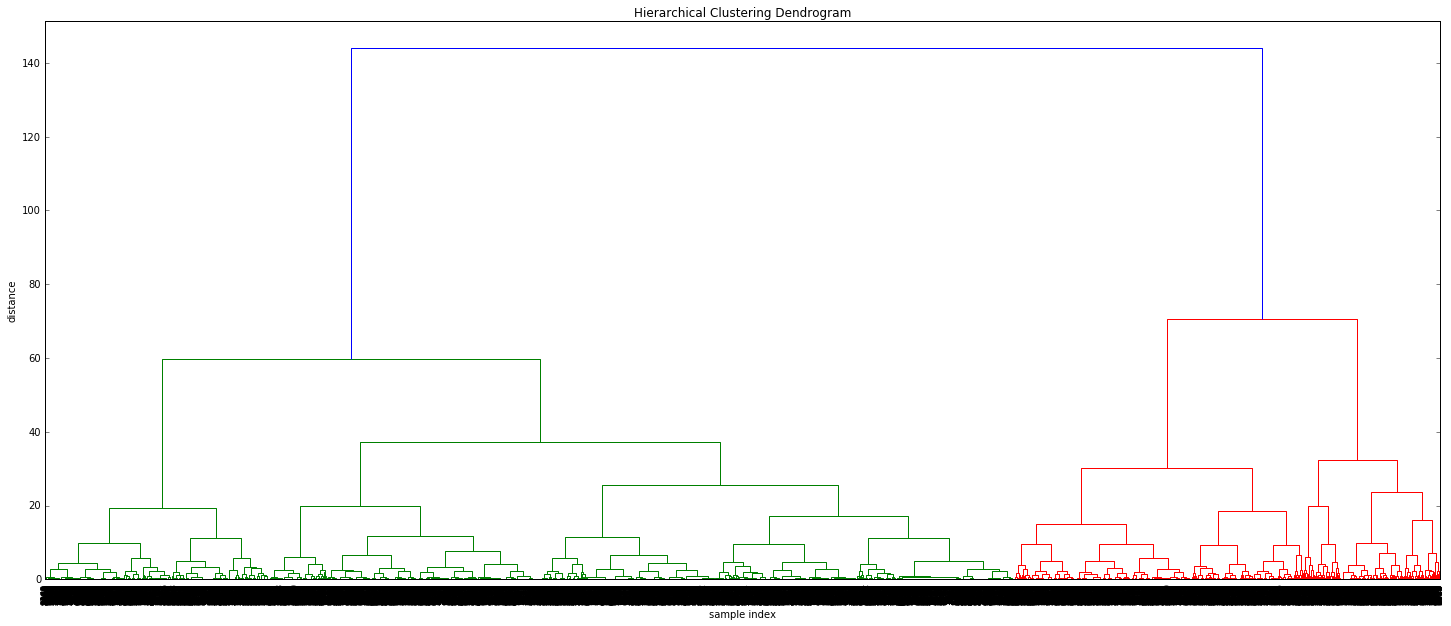

In [29]:
#codigo desde: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X_red, 'ward') # o X

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

La imagen anterior muestra como queda esta estructura jerárquica de árbol sobre el dataset completo de las críticas a las cervezas, donde se puede ver que la unión de cada cluster es bastante balanceada debido a la estructura compacta de los datos.

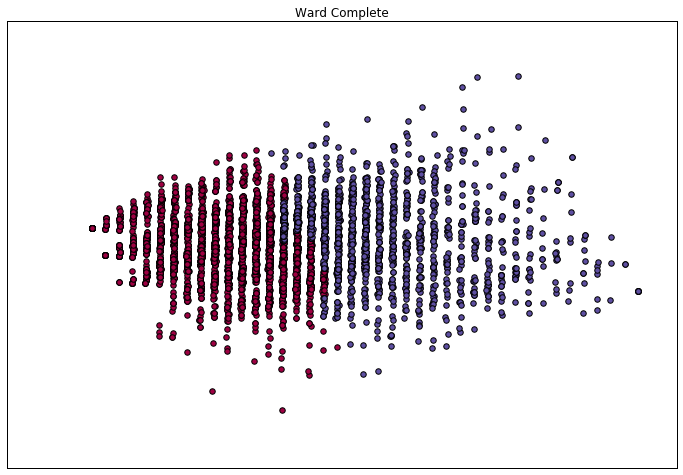

In [60]:
#se ajusta algortmo Ward
from sklearn.cluster import AgglomerativeClustering as hac
k = 2
clustering = hac(linkage="ward", n_clusters=k, affinity='euclidean')
clustering.fit(X_red)

Ward_labels = clustering.labels_

#se grafica
plt.figure(figsize=(12,8))
plt.title('Ward Complete')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,k)]
for k, col in zip(range(k), mcolors):
    my_members = Ward_labels == k
    plt.scatter(X_red[my_members, 0],X_red[my_members, 1],s=30,c=col)
    
plt.xticks(())
plt.yticks(())
plt.show()

Para este algoritmo el única parámetro que es posible variar es el número de clusters (*n_clusters*), debido a que este algoritmo solo funciona con distancia euclidiana y no tiene otros parámetros como la aleatoridad.

Nuevamente, al variar el parámetro *n_clusters* en intervalos de 2 a 50 se puede ver la estructura de los cluster que genera, la cual es bastante similar al algoritmo anterior, por lo que tambien tiene una forma de polígono en base a rectas, y que es generada por la estructura aglomerativa del algoritmo.

No se observan mayores resultados al variar este parametro, ya que solo cambia el numero de clusters a encontrar, pero se sabe que si se supieran de antemano la cantidad de clusters del dataset, quizas se podría encontrar resultados más óptimos.

## DBScan

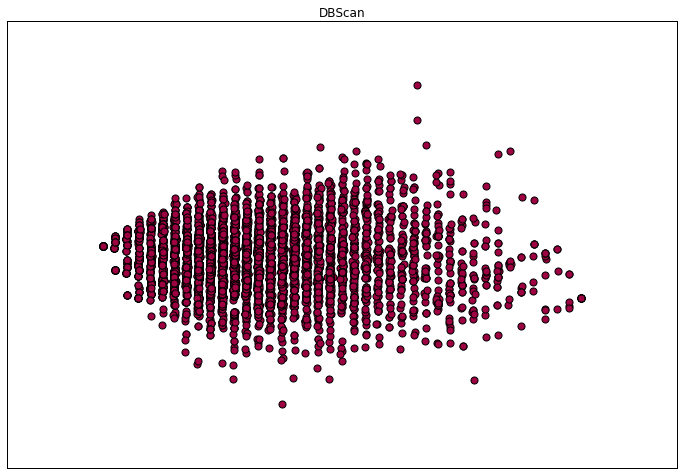

In [74]:
from sklearn.cluster import DBSCAN
plt.clf()

#se ajusta algortmo DBSCAN
clustering = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')

clustering.fit(X_red)

DBScan_labels = clustering.labels_
unique_labels = set(DBScan_labels)
core_samples_mask = np.zeros_like(clustering.labels_, dtype = bool)
core_samples_mask[clustering.core_sample_indices_] = True

#se grafica
plt.figure(figsize=(12,8))
plt.title('DBScan')
cmap = plt.cm.get_cmap(name = "Spectral") 
mcolors = [cmap(i) for i in np.linspace(0,1,len(unique_labels))]
for k, col in zip(unique_labels, mcolors):
    if k == -1:
        col = 'k'

    class_member_mask = (DBScan_labels == k)

    xy = X_red[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, s=50)
    xy = X_red[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=col, s=30)

plt.xticks(())
plt.yticks(())
plt.show()

Se cuenta con 2 parámetros escenciales, *EPS*  y *min_samples* para realizar variaciones y para poder observar cual combinación de estos produce un mejor resultado en la clusterización.

Al variar el parámetro *eps* 

Al variar el parámetro *min_samples*

## Buscando una etiqueta

A continuación se intenta encontrar qué atributo describe mejor a los cluster como etiquetas. Se probarán dos posibles etiquetas: **Nombre de cervecería** y **Tipo de cerveza**.  
Se utilizarán distintas métricas para comparar y obtener un mejor resultado.


¿Qu ́e atributo, Nombre de cervecer ́ıa o Tipo de cerveza, describe mejor a los cluster como eti-
quetas de clase, seg ́
un los resultados obtenidos previamente? ¿Hay mejores marcas que otras en
relaci ́
on a las evaluaciones obtenidas? ¿Se puede definir alg ́
un criterio para determinar el mejor
tipo de cerveza? Comente.

In [7]:
from sklearn import metrics
posible_etiqueta1 = df_sample.brewery_name
posible_etiqueta2 = df_sample.beer_style

### Etiqueta1: Nombres de Cervecería

In [16]:
#calcular etiquetas de clusters con k = cantidad de nombres de cerveza
k = len(set(posible_etiqueta1))

k_means = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=10, init = "k-means++")
hac_complete = hac(linkage="complete", n_clusters=k, affinity="euclidean")
hac_ward = hac(linkage="ward", n_clusters=k, affinity='euclidean')
dbscan = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')


#k_means.fit(X_red)
hac_complete.fit(X_red)
#hac_ward.fit(X_red)
#dbscan.fit(X_red)
            
cluster_etiquetas = hac_complete.labels_

In [17]:
print "Nombre de cerveceria como etiqueta"
possible_etiquetas = posible_etiqueta1 

# escenario supervisado de evaluacion
print "ARI: ",metrics.adjusted_rand_score(possible_etiquetas, cluster_etiquetas) 
print "NMI: ",metrics.normalized_mutual_info_score(possible_etiquetas, cluster_etiquetas)
print "Hom: ",metrics.homogeneity_score(possible_etiquetas, cluster_etiquetas)
print "Compl: ",metrics.completeness_score(possible_etiquetas, cluster_etiquetas)
print "V-mes: ",metrics.v_measure_score(possible_etiquetas, cluster_etiquetas)
print "FMS: ",metrics.fowlkes_mallows_score(possible_etiquetas, cluster_etiquetas)

# escenario no supervisado de evaluacion
print "Silhuette: ",metrics.silhouette_score(X_red, cluster_etiquetas, metric='euclidean')

Nombre de cerveceria como etiqueta
ARI:  0.00110848437319
NMI:  0.562810664108
Hom:  0.586745074467
Compl:  0.539852582353
V-mes:  0.562322922858
FMS:  0.00465489322255
Silhuette: 

KeyboardInterrupt: 

### Etiqueta2: Tipo de cerveza

In [10]:
#calcular etiquetas de clusters con k = cantidad de tipos de cerveza
k = len(set(posible_etiqueta2))

k_means = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=10, init = "k-means++")
hac_complete = hac(linkage="complete", n_clusters=k, affinity="euclidean")
hac_ward = hac(linkage="ward", n_clusters=k, affinity='euclidean')
clustering = DBSCAN(eps=0.3, min_samples=10, metric='euclidean')


#k_means.fit(X_red)
hac_complete.fit(X_red)
#hac_ward.fit(X_red)
#dbscan.fit(X_red)
            
cluster_etiquetas = hac_complete.labels_

In [11]:
print "Tipo de cerveza como etiqueta"
possible_etiquetas = posible_etiqueta2

# escenario supervisado de evaluacion
print "ARI: ",metrics.adjusted_rand_score(possible_etiquetas, cluster_etiquetas) 
print "NMI: ",metrics.normalized_mutual_info_score(possible_etiquetas, cluster_etiquetas)
print "Hom: ",metrics.homogeneity_score(possible_etiquetas, cluster_etiquetas)
print "Compl: ",metrics.completeness_score(possible_etiquetas, cluster_etiquetas)
print "V-mes: ",metrics.v_measure_score(possible_etiquetas, cluster_etiquetas)
print "FMS: ",metrics.fowlkes_mallows_score(possible_etiquetas, cluster_etiquetas)

# escenario no supervisado de evaluacion
print "Silhuette: ",metrics.silhouette_score(X_red, cluster_etiquetas, metric='euclidean')

Tipo de cerveza como etiqueta
ARI:  0.00527527349536
NMI:  0.130782309315
Hom:  0.134177224798
Compl:  0.127473291056
V-mes:  0.130739374803
FMS:  0.0235718995198
Silhuette:  0.511212931462
